In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
recipes=pd.read_csv("recipes.csv")
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57691 entries, 0 to 57690
Columns: 384 entries, country to zucchini
dtypes: object(384)
memory usage: 169.0+ MB


In [3]:
recipes.head().T


,0,1,2,3,4
country,Vietnamese,Vietnamese,Vietnamese,Vietnamese,Vietnamese
almond,No,No,No,No,No
angelica,No,No,No,No,No
anise,No,No,No,No,No
anise_seed,No,No,No,No,No
...,...,...,...,...,...
wood,No,No,No,No,No
yam,No,No,No,No,No
yeast,No,No,No,No,No
yogurt,No,No,No,No,No


So our dataset consists of 57,691 recipes. Each row represents a recipe, and for each recipe, the corresponding cuisine is documented as well as whether 384 ingredients exist in the recipe or not, beginning with almond and ending with zucchini.


We know that a basic sushi recipe includes the ingredients:

-   rice
-   soy sauce
-   wasabi
-   some fish/vegetables


In [4]:
#Let's check that these ingredients exist in our dataframe:

ingredients = list(recipes.columns.values)

print([match.group(0) for ingredient in ingredients for match in [(re.compile(".*(rice).*")).search(ingredient)] if match])
print([match.group(0) for ingredient in ingredients for match in [(re.compile(".*(wasabi).*")).search(ingredient)] if match])
print([match.group(0) for ingredient in ingredients for match in [(re.compile(".*(soy).*")).search(ingredient)] if match])

['brown_rice', 'licorice', 'rice']
['wasabi']
['soy_sauce', 'soybean', 'soybean_oil']


In this section, we will prepare data for the next stage in the data science methodology, which is modeling. This stage involves exploring the data further and making sure that it is in the right format for the machine learning algorithm that we selected in the analytic approach stage, which is decision trees.First, look at the data to see if it needs cleaning.



In [5]:
recipes["country"].value_counts() # frequency table

country
American        40150
Mexico           1754
Italian          1715
Italy            1461
Asian            1176
                ...  
Indonesia          12
Belgium            11
East-African       11
Israel              9
Bangladesh          4
Name: count, Length: 69, dtype: int64

By looking at the above table, we can make the following observations:

1.  Cuisine column is labeled as Country, which is inaccurate.
2.  Cuisine names are not consistent as not all of them start with an uppercase first letter.
3.  Some cuisines are duplicated as variation of the country name, such as Vietnam and Vietnamese.
4.  Some cuisines have very few recipes.


#### Let's fix these problems.


In [6]:
#Fix the name of the column showing the cuisine.

column_names = recipes.columns.values
column_names[0] = "cuisine"
recipes.columns = column_names

recipes

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
1,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
2,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
3,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
4,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57686,Japan,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
57687,Japan,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
57688,Japan,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
57689,Japan,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No


Make all the cuisine names lowercase.


In [7]:
recipes["cuisine"] = recipes["cuisine"].str.lower()

Remove cuisines with < 50 recipes.


In [8]:
# get list of cuisines to keep
recipes_counts = recipes["cuisine"].value_counts()
cuisines_indices = recipes_counts > 50

cuisines_to_keep = list(np.array(recipes_counts.index.values)[np.array(cuisines_indices)])

In [9]:
rows_before = recipes.shape[0] # number of rows of original dataframe
print("Number of rows of original dataframe is {}.".format(rows_before))

recipes = recipes.loc[recipes['cuisine'].isin(cuisines_to_keep)]

rows_after = recipes.shape[0] # number of rows of processed dataframe
print("Number of rows of processed dataframe is {}.".format(rows_after))

print("{} rows removed!".format(rows_before - rows_after))

Number of rows of original dataframe is 57691.
Number of rows of processed dataframe is 57282.
409 rows removed!


Convert all Yes's to 1's and the No's to 0's

In [11]:
""""""

recipes = recipes.replace(to_replace="Yes", value=1)
recipes = recipes.replace(to_replace="No", value=0)

#### Let's analyze the data a little more in order to learn the data better and note any interesting preliminary observations.


Run the following cell to get the recipes that contain **rice** _and_ **soy** _and_ **wasabi** _and_ **seaweed**.


In [12]:
check_recipes = recipes.loc[
    (recipes["rice"] == 1) &
    (recipes["soy_sauce"] == 1) &
    (recipes["wasabi"] == 1) &
    (recipes["seaweed"] == 1)
]

check_recipes

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
11306,japanese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11321,japanese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
11361,japanese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12171,asian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
12385,asian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13010,asian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13159,asian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13513,japanese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13586,japanese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13625,east_asian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Based on the results of the above code, can we classify all recipes that contain **rice** _and_ **soy** _and_ **wasabi** _and_ **seaweed** as **Japanese** recipes? Why?
NO

In [13]:
# sum each column
ing = recipes.iloc[:, 1:].sum(axis=0)

In [14]:
# define each column as a pandas series
ingredient = pd.Series(ing.index.values, index = np.arange(len(ing)))
count = pd.Series(list(ing), index = np.arange(len(ing)))

# create the dataframe
ing_df = pd.DataFrame(dict(ingredient = ingredient, count = count))
ing_df = ing_df[["ingredient", "count"]]
print(ing_df.to_string())

                  ingredient  count
0                     almond   2306
1                   angelica      1
2                      anise    223
3                 anise_seed     87
4                      apple   2420
5               apple_brandy     37
6                    apricot    619
7                   armagnac     11
8                  artemisia     13
9                  artichoke    391
10                 asparagus    459
11                   avocado    660
12                     bacon   2166
13              baked_potato      9
14                      balm      3
15                    banana    989
16                    barley    266
17             bartlett_pear     23
18                     basil   3833
19                       bay   1457
20                      bean   1971
21                     beech      1
22                      beef   4877
23                beef_broth    842
24                beef_liver     10
25                      beer    307
26                      beet

Now we have a dataframe of ingredients and their total counts across all recipes. Let's sort this dataframe in descending order.


In [15]:
ing_df.sort_values(["count"], ascending=False, inplace=True)
ing_df.reset_index(inplace=True, drop=True)

print(ing_df)

          ingredient  count
0                egg  20997
1              wheat  20757
2             butter  20699
3              onion  18033
4             garlic  17287
..               ...    ...
378  sturgeon_caviar      1
379      kaffir_lime      1
380            beech      1
381           durian      0
382          pimenta      0

[383 rows x 2 columns]


Let's create a profile for each cuisine.
In other words, let's try to find out what ingredients Chinese people typically use, and what is Canadian food for example.

In [16]:
cuisines = recipes.groupby("cuisine").mean()
cuisines.head()

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
cuisine,,,,,,,,,,,,,,,,,,,,,
african,0.156522,0.000000,0.000000,0.000000,0.034783,0.000000,0.069565,0.0000,0.0,0.000000,...,0.000000,0.008696,0.043478,0.008696,0.017391,0.000000,0.008696,0.017391,0.000000,0.034783
american,0.040598,0.000025,0.003014,0.000573,0.052055,0.000623,0.011308,0.0001,0.0,0.006351,...,0.002964,0.006874,0.030809,0.014819,0.011009,0.000672,0.001445,0.068219,0.016912,0.018630
asian,0.007544,0.000000,0.000838,0.002515,0.012573,0.000000,0.005029,0.0000,0.0,0.000000,...,0.000838,0.001676,0.038558,0.001676,0.124895,0.000000,0.001676,0.004191,0.010897,0.011735
cajun_creole,0.000000,0.000000,0.000000,0.000000,0.006849,0.000000,0.000000,0.0000,0.0,0.000000,...,0.000000,0.006849,0.082192,0.000000,0.191781,0.000000,0.006849,0.034247,0.006849,0.000000
canada,0.036176,0.000000,0.000000,0.000000,0.036176,0.000000,0.002584,0.0000,0.0,0.001292,...,0.002584,0.003876,0.029716,0.020672,0.003876,0.000000,0.001292,0.067183,0.019380,0.011628


As shown above, we have just created a dataframe where each row is a cuisine and each column (except for the first column) is an ingredient, and the row values represent the percentage of each ingredient in the corresponding cuisine.

For example:

almond is present across 15.65% of all of the African recipes.
butter is present across 38.11% of all of the Canadian recipes.

In [17]:
num_ingredients = 4 # define number of top ingredients to print

# define a function that prints the top ingredients for each cuisine
def print_top_ingredients(row):
    print(row.name.upper())
    row_sorted = row.sort_values(ascending=False)*100
    top_ingredients = list(row_sorted.index.values)[0:num_ingredients]
    row_sorted = list(row_sorted)[0:num_ingredients]

    for ind, ingredient in enumerate(top_ingredients):
        print("%s (%d%%)" % (ingredient, row_sorted[ind]), end=' ')
    print("\n")

# apply function to cuisines dataframe
create_cuisines_profiles = cuisines.apply(print_top_ingredients, axis=1)

AFRICAN
onion (53%) olive_oil (52%) garlic (49%) cumin (42%) 

AMERICAN
butter (41%) egg (40%) wheat (39%) onion (29%) 

ASIAN
soy_sauce (49%) ginger (48%) garlic (47%) rice (41%) 

CAJUN_CREOLE
onion (69%) cayenne (56%) garlic (48%) butter (36%) 

CANADA
wheat (39%) butter (38%) egg (35%) onion (34%) 

CARIBBEAN
onion (51%) garlic (50%) vegetable_oil (31%) black_pepper (31%) 

CENTRAL_SOUTHAMERICAN
garlic (56%) onion (54%) cayenne (51%) tomato (41%) 

CHINA
soy_sauce (70%) garlic (45%) scallion (43%) egg (39%) 

CHINESE
soy_sauce (67%) ginger (59%) garlic (56%) scallion (50%) 

EAST_ASIAN
garlic (55%) soy_sauce (50%) scallion (49%) cayenne (47%) 

EASTERN-EUROPE
wheat (53%) egg (52%) butter (48%) onion (45%) 

EASTERNEUROPEAN_RUSSIAN
butter (60%) egg (50%) wheat (49%) onion (38%) 

ENGLISH_SCOTTISH
butter (67%) wheat (62%) egg (53%) cream (41%) 

FRANCE
butter (54%) egg (46%) wheat (43%) onion (32%) 

FRENCH
butter (48%) egg (43%) wheat (35%) olive_oil (30%) 

GERMAN
butter (55%) whea

In [18]:
%matplotlib inline
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt

# If running locally, you can try using the graphviz library but we'll use sklearn's plot_tree method
# !conda install python-graphviz --yes
# from sklearn.tree import export_graphviz

import itertools

#bamboo_tree
# Only Asian and Indian Cuisines
Here, we are creating a decision tree for the recipes for just some of the Asian (Korean, Japanese, Chinese, Thai) and Indian cuisines. The reason for this is because the decision tree does not run well when the data is biased towards one cuisine, in this case American cuisines. One option is to exclude the American cuisines from our analysis or just build decision trees for different subsets of the data. Let's go with the latter solution.

Let's build our decision tree using the data pertaining to the Asian and Indian cuisines and name our decision tree bamboo_tree.

In [19]:
# select subset of cuisines
asian_indian_recipes = recipes[recipes.cuisine.isin(["korean", "japanese", "chinese", "thai", "indian"])]
cuisines = asian_indian_recipes["cuisine"]
ingredients = asian_indian_recipes.iloc[:,1:]

bamboo_tree = tree.DecisionTreeClassifier(max_depth=3)
bamboo_tree.fit(ingredients, cuisines)

print("Decision tree model saved to bamboo_tree!")

Decision tree model saved to bamboo_tree!


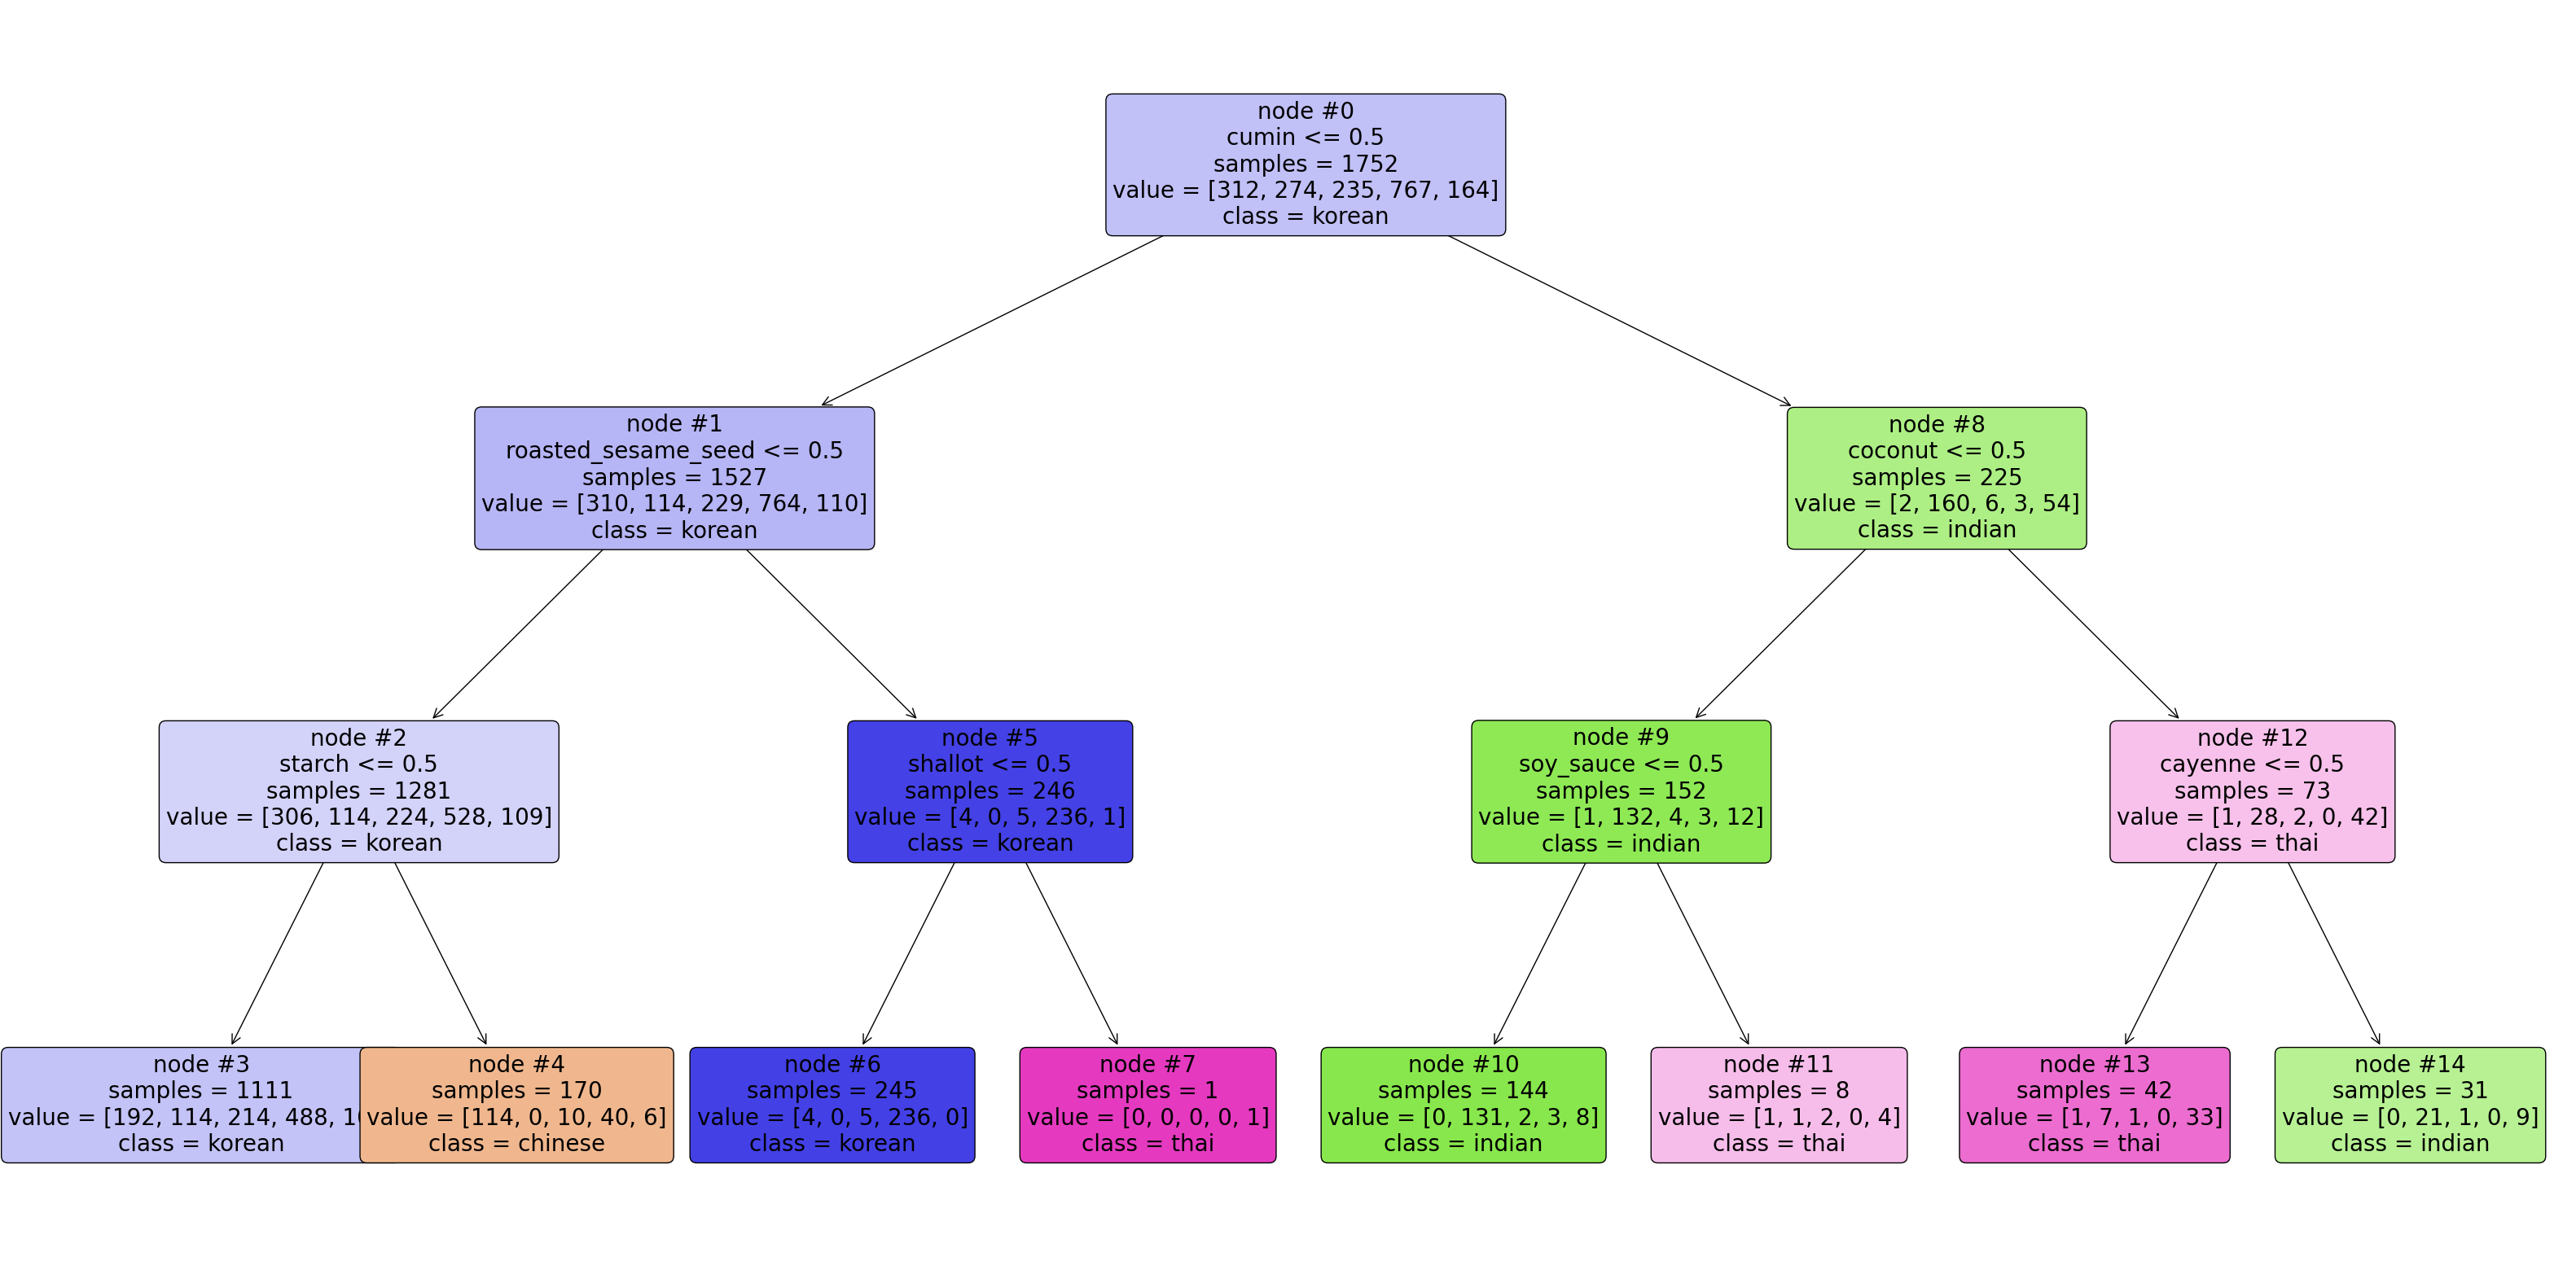

In [20]:
plt.figure(figsize=(40,20))  # customize according to the size of your tree
_ = tree.plot_tree(bamboo_tree,
                   feature_names = list(ingredients.columns.values),
                   class_names=np.unique(cuisines),filled=True,
                   node_ids=True,
                   impurity=False,
                   label="all",
                   fontsize=20, rounded = True)
plt.show()

he decision tree learned:

If a recipe contains cumin and fish and no yoghurt, then it is most likely a Thai recipe.
If a recipe contains cumin but no fish and no soy_sauce, then it is most likely an Indian recipe.
You can analyze the remaining branches of the tree to come up with similar rules for determining the cuisine of different recipes.

Feel free to select another subset of cuisines and build a decision tree of their recipes. You can select some European cuisines and build a decision tree to explore the ingredients that differentiate them

# Model Eval
To evaluate our model of Asian and Indian cuisines, we will split our dataset into a training set and a test set. We will build the decision tree using the training set. Then, we will test the model on the test set and compare the cuisines that the model predicts to the actual cuisines.

Let's first create a new dataframe using only the data pertaining to the Asian and the Indian cuisines, and let's call the new dataframe bamboo.

In [21]:
bamboo = recipes[recipes.cuisine.isin(["korean", "japanese", "chinese", "thai", "indian"])]
bamboo.cuisine.value_counts()

cuisine
korean      767
chinese     312
indian      274
japanese    235
thai        164
Name: count, dtype: int64

In [32]:
sample_n=30


# take 30 recipes from each cuisine
np.random.seed(1234) # set random seed
bamboo_test = bamboo.groupby("cuisine", group_keys=False).apply(lambda x: x.sample(sample_n))

bamboo_test_ingredients = bamboo_test.iloc[:,1:] # ingredients
bamboo_test_cuisines = bamboo_test["cuisine"] # corresponding cuisines or labels

Nmext, let's create the training set by removing the test set from the bamboo dataset, and let's call the training set bamboo_train.

In [34]:
bamboo_test_index = bamboo.index.isin(bamboo_test.index)
bamboo_train = bamboo[~bamboo_test_index]

bamboo_train_ingredients = bamboo_train.iloc[:,1:] # ingredients
bamboo_train_cuisines = bamboo_train["cuisine"] # corresponding cuisines or labels

In [35]:
bamboo_train_tree = tree.DecisionTreeClassifier(max_depth=15)
bamboo_train_tree.fit(bamboo_train_ingredients, bamboo_train_cuisines)

print("Decision tree model saved to bamboo_train_tree!")

Decision tree model saved to bamboo_train_tree!


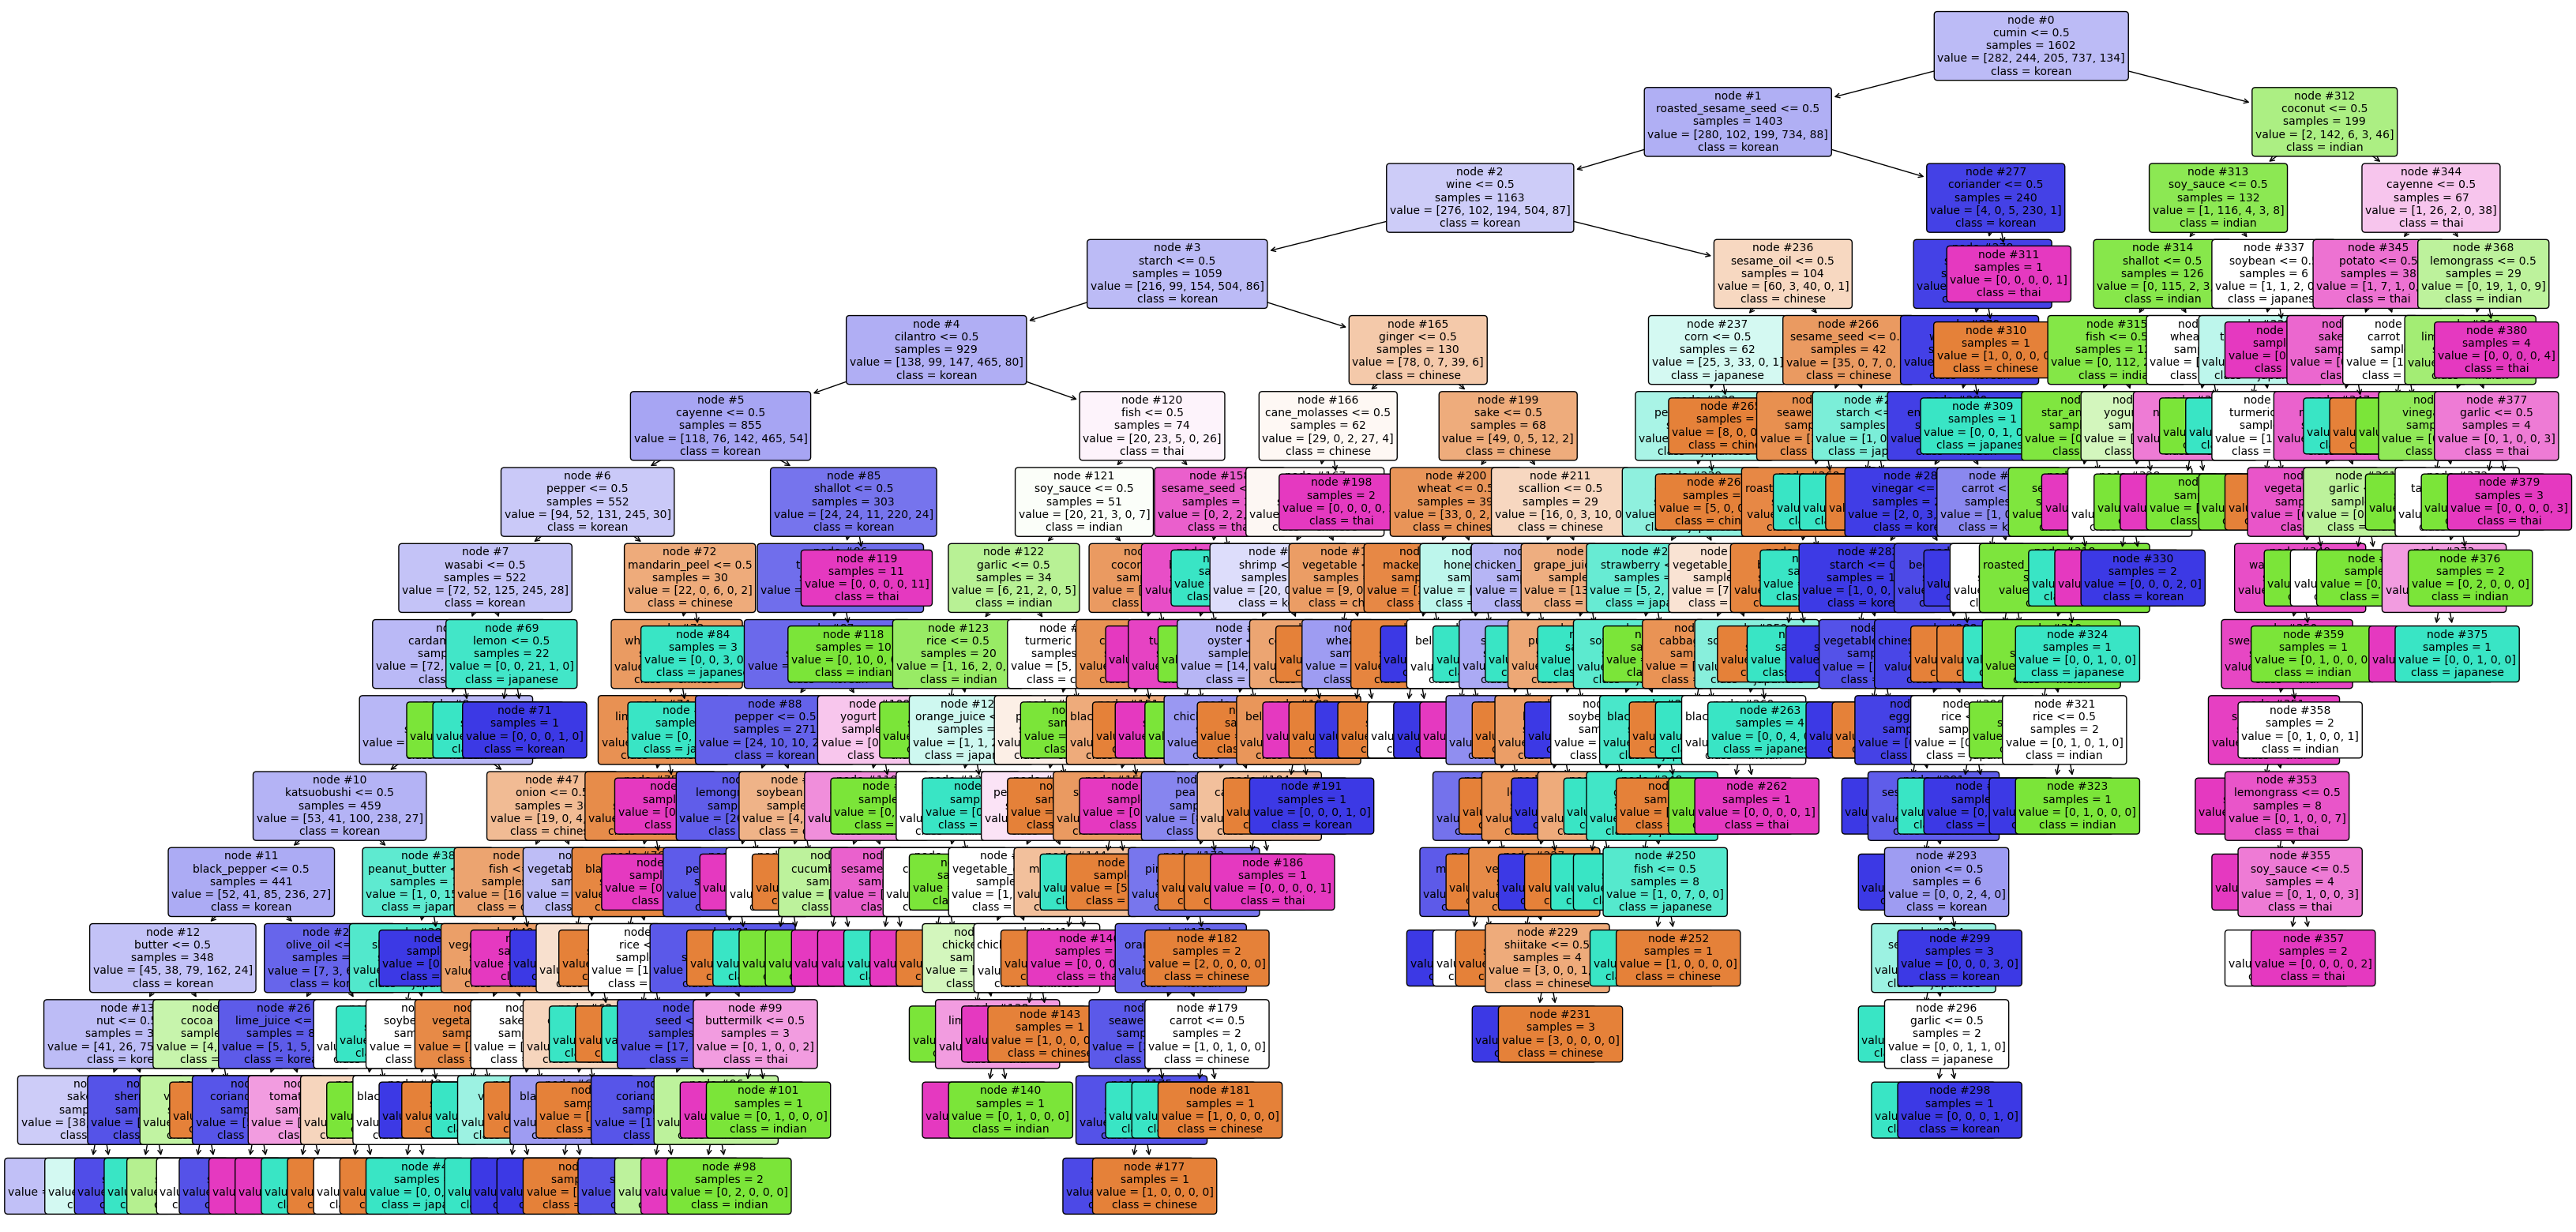

In [36]:
plt.figure(figsize=(40,20))  # customize according to the size of your tree
_ = tree.plot_tree(bamboo_train_tree,
                   feature_names=list(bamboo_train_ingredients.columns.values),
                   class_names=np.unique(bamboo_train_cuisines),
                   filled=True,
                   node_ids=True,
                   impurity=False,
                   label="all",
                   fontsize=10, rounded = True)
plt.show()

#### Now let's test our model on the test data.


In [37]:
bamboo_pred_cuisines = bamboo_train_tree.predict(bamboo_test_ingredients)

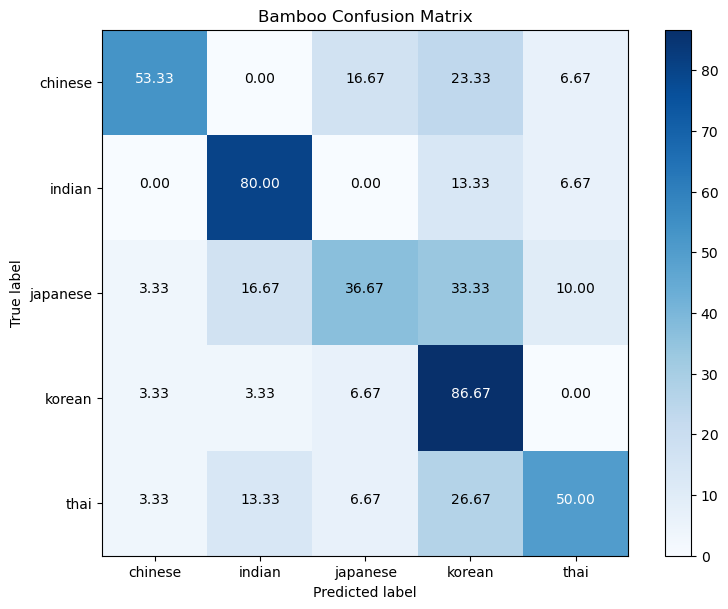

In [38]:
test_cuisines = np.unique(bamboo_test_cuisines)
bamboo_confusion_matrix = confusion_matrix(bamboo_test_cuisines, bamboo_pred_cuisines, labels = test_cuisines)
title = 'Bamboo Confusion Matrix'
cmap = plt.cm.Blues

plt.figure(figsize=(8, 6))
bamboo_confusion_matrix = (
    bamboo_confusion_matrix.astype('float') / bamboo_confusion_matrix.sum(axis=1)[:, np.newaxis]
    ) * 100

plt.imshow(bamboo_confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(test_cuisines))
plt.xticks(tick_marks, test_cuisines)
plt.yticks(tick_marks, test_cuisines)

fmt = '.2f'
thresh = bamboo_confusion_matrix.max() / 2.
for i, j in itertools.product(range(bamboo_confusion_matrix.shape[0]), range(bamboo_confusion_matrix.shape[1])):
    plt.text(j, i, format(bamboo_confusion_matrix[i, j], fmt),
             horizontalalignment="center",
             color="white" if bamboo_confusion_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

The rows represent the actual cuisines from the dataset and the columns represent the predicted ones. Each row should sum to 100%. According to this confusion matrix, we make the following observations:

*   Using the first row in the confusion matrix, 60% of the **Chinese** recipes in **bamboo_test** were correctly classified by our decision tree whereas 37% of the **Chinese** recipes were misclassified as **Korean** and 3% were misclassified as **Indian**.

*   Using the Indian row, 77% of the **Indian** recipes in **bamboo_test** were correctly classified by our decision tree and 3% of the **Indian** recipes were misclassified as **Chinese** and 13% were misclassified as **Korean** and 7% were misclassified as **Thai**.


**Please note** that because decision trees are created using random sampling of the datapoints in the training set, then you may not get the same results every time you create the decision tree even using the same training set. The performance should still be comparable though! So don't worry if you get slightly different numbers in your confusion matrix than the ones shown above.
